# Trauma Registration Simulation Model

In [15]:
import simpy
import random
import statistics
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [16]:
wait_times = []

In [17]:
# Building the blue print for the system that bis Trauma Center
# The parts of a Trauma center are front desk patient nregistrars(num_registrars), Trauma Specialists who decides the trauma level(trauma_nurses) and icu porters who take patients to ICU immediately
# Based on the historic data from the hospital we are taking the randomn wait time to get registered at the fromnt desk is between 1 to 3 inutes
# The Random wait time to get evaluated by a Trauma nurse is 1 to 4 minutes.
# The average wait time to be taken by hospital staff(icuporters) is 1 to 3 minutes.

In [18]:
class TraumaCenter(object):
    def __init__(self, env, num_registrars, num_traumanurses, num_icuporters):
        self.env = env
        self.registrar = simpy.Resource(env, num_registrars)
        self.traumanurse = simpy.Resource(env, num_traumanurses)
        self.icuporter = simpy.Resource(env, num_icuporters)
    def get_registered(self, patient):
        yield self.env.timeout(random.randint(1, 3))

    def check_traumanurse(self, patient):
        yield self.env.timeout(random.randint(1, 4))

    def get_icuporter(self, patient):
        yield self.env.timeout(random.randint(1, 3))    

In [19]:
# When a patient arrives at the Trauma Center, they’ll request a resource(registrars,trauma_nurses and icuporters are all shared resources, wait for its process to complete, and then get admitted into ICU based on their Trauma level. create a function, called go_to_traumacenter(), to keep track of this:

In [20]:
def go_to_traumacenter(env, patient, traumacenter):
    # patient arrives at the traumacenter
    arrival_time = env.now

    with traumacenter.registrar.request() as request:
        yield request
        yield env.process(traumacenter.get_registered(patient))

    with traumacenter.traumanurse.request() as request:
        yield request
        yield env.process(traumacenter.check_traumanurse(patient))

    with traumacenter.icuporter.request() as request:
        yield request
        yield env.process(traumacenter.get_icuporter(patient))

    # patient heads into the ICU Facility
    wait_times.append(env.now - arrival_time)

In [21]:
# Define a function to run the simulation. run_traumacenter will be responsible for creating an instance of a traumacenter and generating patients until the simulation stops. The first thing this function should do is create an instance of a traumacenter:
# use range() to populate the traumacenter with 3 patients. Then, you use env.process() to tell the simulation to prepare to move them through the ICU Facility.
# looking at past data, you learn that patients  tend to arrive at the ICU Facility, on average, every 55 seconds
# The below 0.91 we got by dividing  55 seconds by 60 seconds


In [22]:
def run_traumacenter(env, num_registrars, num_traumanurses, num_icuporters):
    traumacenter = TraumaCenter(env, num_registrars, num_traumanurses, num_icuporters)

    for patient in range(5):
        env.process(go_to_traumacenter(env, patient, traumacenter))

    while True:
        yield env.timeout(0.91)  # Wait a bit before generating a new patient

        patient += 1
        env.process(go_to_traumacenter(env, patient, traumacenter))


In [23]:
#Calculate average wait times in hours, mins and seconds

In [24]:
def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    # print the results
    
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    hours = frac_minutes / 60
    return round(hours), round(minutes), round(seconds)


In [25]:
#Get user input for number of registrars, number of trauma nurses, number of icuporters to run the simulation

In [26]:
def get_user_input():
    num_registrars = input("Input # of registrars working: ")
    num_traumanurses = input("Input # of traumanurses working: ")
    num_icuporters = input("Input # of icuporters working: ")
    params = [num_registrars, num_traumanurses, num_icuporters]
    if all(str(i).isdigit() for i in params):  # Check input is valid
        params = [int(x) for x in params]
    else:
        print(
            "Could not parse input. Simulation will use default values:",
            "\n1 registrar, 1 traumanurse, 1 icuporter.",
        )
        params = [1, 1, 1]
    return params


In [27]:
# main program calling to run the si8mulation for user input and plot the results.
# on x-axis number of registrars, number of trauma nurses and number of icu porters, on y-axis wait time in hours,mins and secs.

Input # of registrars working: 3
Input # of traumanurses working: 3
Input # of icuporters working: 3
Running simulation... 
The average wait time is 0 hours, 7 minutes and 38 seconds.


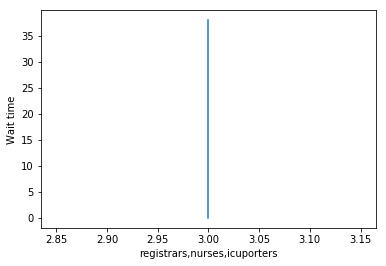

In [28]:
def main():
    # Setup
    random.seed(42)
    num_registrars, num_traumanurses, num_icuporters = get_user_input()

    # Run the simulation for 90 minutes
    env = simpy.Environment()
    env.process(run_traumacenter(env, num_registrars, num_traumanurses, num_icuporters))
    env.run(until=90) 

    # View the results
    hours, mins, secs = get_average_wait_time(wait_times)
    # x axis values(trauma staff)
    x = [num_registrars, num_traumanurses, num_icuporters]
    # corresponding y axis values(wait times)
    y = [hours, mins, secs]
    plt.xlabel('registrars,nurses,icuporters')
    plt.ylabel('Wait time')
    print(
        "Running simulation...",
        f"\nThe average wait time is {hours} hours, {mins} minutes and {secs} seconds.",
    )
    
    # Plot the results
    plt.plot(x, y)
    plt.show
if __name__ == "__main__":
    main()


#  Validation of the Model

I validated the Model and plotted the results by giving different input values for num_registrars, num_traumanurses, num_icuporters
Everytime I noticed that greater the number of resources(num_registrars, num_traumanurses, num_icuporters) less is the wait time. So to reduce the wait time in Trauma centers more numer of shared resources(the staff we need).
I again validated model by increasing and decreasing the random time take n by icu porters and trauma level validation nurses, More time taken by them results in more wait time.

Example1: 
Below the average wait time at trauma nurse is 1 to 7 minutes and icuporter is 1 to 6 minutes
def get_registered(self, patient):
        yield self.env.timeout(random.randint(1, 3))

    def check_traumanurse(self, patient):
        yield self.env.timeout(random.randint(1, 7))

    def get_icuporter(self, patient):
        yield self.env.timeout(random.randint(1, 6))    

Input # of registrars working: 10
Input # of traumanurses working: 10
Input # of icuporters working: 10
Running simulation... 
The average wait time is 0 hours, 9 minutes and 15 seconds.

Example 2 : 
Below the average wait time at trauma nurse is 1 to 4 minutes and icuporter is 1 to 3 minutes
def get_registered(self, patient):
        yield self.env.timeout(random.randint(1, 3))

    def check_traumanurse(self, patient):
        yield self.env.timeout(random.randint(1, 4))

    def get_icuporter(self, patient):
        yield self.env.timeout(random.randint(1, 3))  
        
Input # of registrars working: 10
Input # of traumanurses working: 10
Input # of icuporters working: 10
Running simulation... 
The average wait time is 0 hours, 6 minutes and 22 seconds.     

# Conclusion

I am concluding from this simulation that especially at Trauma centers we need more people to Register, look at the patient Trauma intensity level and then people to transfer them to ICU Facility.
As I mentioned in FlowChart 1st priority is given to Level 3 Trauma patients(Cardiac,brainstroke,severe brain injury patients), 2nd priority to Level2(Burned patients, Kidney Failure, Accident Patients) and third priority to Level3(other Trauma Patients) all are queued in.
So more number of shared resources less wait times for Trauma Emergency patients.